In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df=pd.DataFrame()

In [3]:
df["X1"]=[1,2,3,4,5,6,6,7,9,9]
df["X2"]=[5,3,6,8,1,9,5,8,9,2]
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

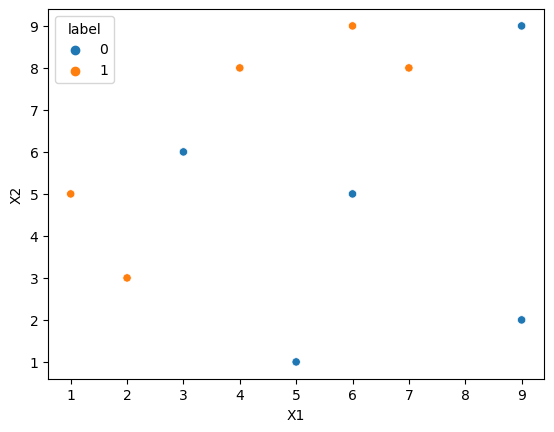

In [6]:
sns.scatterplot(data=df,x="X1",y="X2",hue="label")

In [7]:
# first we will assign weights to. every row by 1/no.of rows

In [8]:
df["weights"]=1/df.shape[0]

In [9]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1=DecisionTreeClassifier(max_depth=1) # first decesion stump

In [12]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [13]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

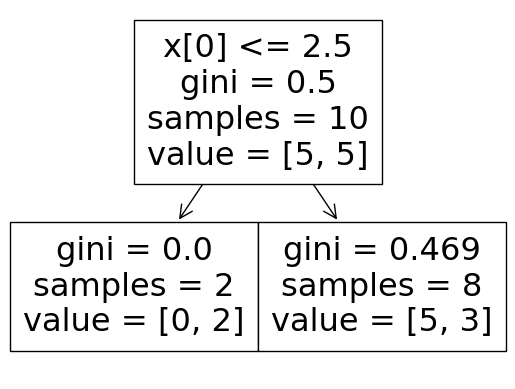

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

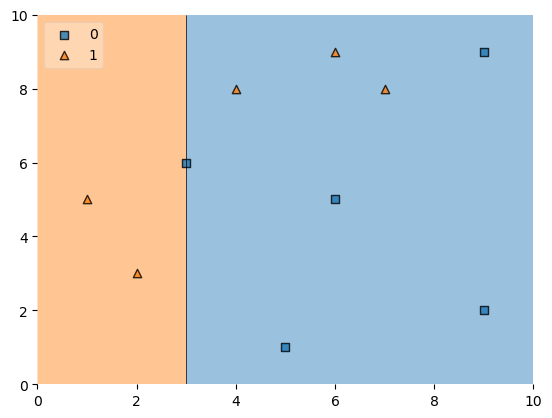

In [15]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [16]:
df["y_pred"]=dt1.predict(x)

In [17]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [18]:
# to calculate the weigth of our first model we need to calculate the error
# to calculate the error we add the weight of our mis classified points row no(3,5,7)

In [19]:
def caclulate_model_weight(error):
    return 0.5 * np.log((1-error)/error)

In [20]:
# error = submission of weights of missclassified points (0.1+0.1+0.1)
alpha1=caclulate_model_weight(0.3)
alpha1

0.42364893019360184

In [21]:
#updating weights 
# increasing weights of misclassified points 
# decresing weights of correctly classified points

In [22]:
def update_row_weight(row,alpha=0.423):
    if row["label"]==row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] *np.exp(alpha)

In [23]:
df["update_weights"]=df.apply(update_row_weight,axis=1)

In [24]:
df

,X1,X2,label,weights,y_pred,update_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [25]:
df["update_weights"].sum() # the sum of updated weight should be 1 so we will normalise it

0.9165153319682015

In [26]:
df["normalized_weights"]=df["update_weights"]/df["update_weights"].sum()

In [27]:
df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [28]:
df["normalized_weights"].sum() # now it is 1

1.0

In [29]:
# now we will create range

In [30]:
df["cumsum_upper"]=np.cumsum(df["normalized_weights"])
df["cumsum_lower"]=df["cumsum_upper"]-df["normalized_weights"]

In [31]:
df[['X1', 'X2', 'label', 'weights', 'y_pred','update_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,update_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [32]:
# we will create new data set by generting 10 random numbers and then selecting the range in wch they lie
# and those rows will be selected

In [33]:
def create_new_dataset(df):
    indices=[]
    
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row["cumsum_upper"]>a and a>row["cumsum_lower"]:
                indices.append(index)
    return indices

In [34]:
index_values=create_new_dataset(df)

In [35]:
index_values

[5, 5, 0, 8, 9, 8, 5, 7, 2, 3]

In [36]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [37]:
second_df  # again we will assign the weights by 1/number of rows

,X1,X2,label,weights
5,6,9,1,0.1
5,6,9,1,0.1
0,1,5,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1


In [38]:
# in this way we we will do it for multiple times and then we will do fiinal prediction 

In [39]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_circles
import matplotlib.pyplot  as plt

In [40]:
np.random.seed(42)
x,Y = make_circles (n_samples=500, factor=0.1, noise=0.35, random_state=42)

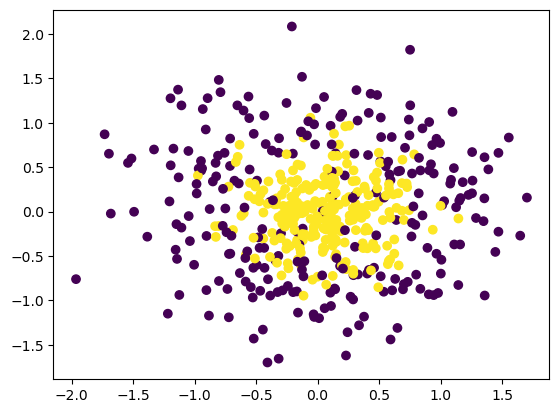

In [41]:
plt.scatter(x[:,0],x[:,1],c=Y)

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [43]:
abc=AdaBoostClassifier() # keeping all the default values

In [44]:
np.mean(cross_val_score(abc,x,Y,scoring="accuracy",cv=10))

0.786

In [45]:
abc.fit(x,Y)

AdaBoostClassifier()

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']

In [48]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

In [49]:
gr=grid_search.fit(x,Y)

In [50]:
gr.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}

In [51]:
gr.best_score_

0.8320000000000001